In [26]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")


![Alt Text](ladybug.png)


In [73]:
#make sure that you download the ladybug image in the same folder.
image = imread("ladybug.png")

In [74]:
image.shape

(363, 642, 4)

The image is represented by a 3D matrix, where the first dimension corresponds to the height (363), the second dimension corresponds to the width (642), and the third dimension corresponds to the number of color channels (4). In this case, the color channels are RGBA, as explained below:

Images are commonly stored in one of the following color channel formats:

Grayscale:
Grayscale images have only one channel representing the intensity of the light at each pixel. The intensity values range from 0 (black) to 255 (white).

RGB (Red, Green, Blue):
RGB images have three color channels, one for each primary color: Red, Green, and Blue. Each channel has intensity values ranging from 0 to 255. Combining these three channels allows for the representation of a wide range of colors.

RGBA (Red, Green, Blue, Alpha):
RGBA images have four channels: Red, Green, Blue, and Alpha. The first three channels represent the primary colors, while the fourth channel, Alpha, represents the opacity (transparency) of each pixel. The Alpha channel's intensity values also range from 0 to 255, with 0 being completely transparent and 255 being completely opaque.

CMYK (Cyan, Magenta, Yellow, Key/Black):
CMYK images have four channels, one for each color: Cyan, Magenta, Yellow, and Key (Black). This color model is mainly used in the printing industry, as it represents the colors of ink used in the printing process. Each channel has intensity values ranging from 0 to 100 (percentage of ink coverage).

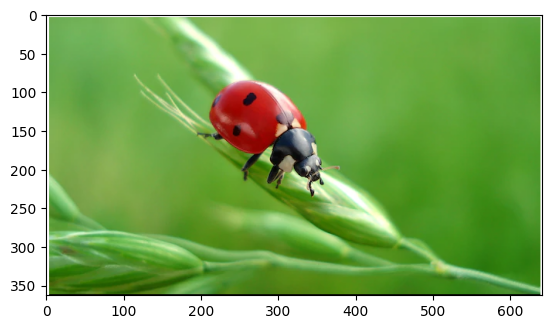

In [11]:
plt.imshow(image)

In [18]:
x = image.reshape(-1,4)


In [19]:
x.shape

(233046, 4)

In [63]:
from sklearn.cluster import KMeans


In [75]:
kmeans = KMeans(n_clusters=4).fit(x)

In [76]:
segmented_image = kmeans.cluster_centers_[kmeans.labels_]


In [82]:
kmeans.cluster_centers_
kmeans.labels_

array([[0.44689098, 0.10836595, 0.09495036, 1.        ],
       [0.30149925, 0.5590752 , 0.1306018 , 1.        ],
       [0.8917053 , 0.93948054, 0.8281429 , 1.        ],
       [0.4542307 , 0.67851865, 0.3039994 , 1.        ]], dtype=float32)

kmeans.cluster_centers_: This is an attribute of a fitted KMeans object, which contains the coordinates of the cluster centers in the feature space. In the context of image segmentation, each cluster center corresponds to a representative color for each segment. This is basically an RGBA value for each of the k clusters. 

kmeans.labels_: This is another attribute of a fitted KMeans object, which contains the labels of each data point (in this case, the pixels of the image). These labels indicate which cluster each pixel belongs to. This is basically going to be an array, indicating which cluster each pixel belongs to. 

The expression kmeans.cluster_centers_[kmeans.labels_] creates a new array with the same shape as kmeans.labels_, but with each label replaced by the corresponding cluster center (representative color).

In [77]:
segmented_image = segmented_image.reshape(image.shape)

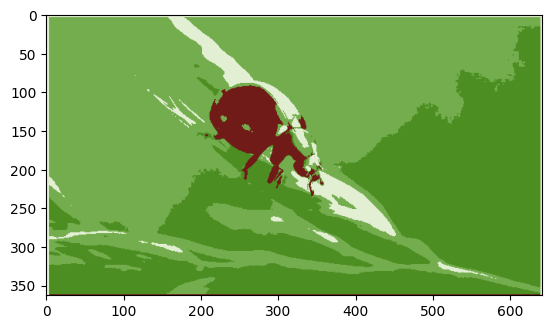

In [78]:
plt.imshow(segmented_image)

In [69]:
kmeans.inertia_

3711.605224609375

In [71]:
from sklearn.metrics import silhouette_score
silhouette_score(x,kmeans.labels_)
#this will take a long time to run, but the value will be almost 0.53 for k=4 clusters 

0.5327007

In [72]:
kmeans.cluster_centers_

array([[0.3011877 , 0.55880547, 0.13029997, 1.        ],
       [0.8910508 , 0.93899167, 0.8271758 , 1.        ],
       [0.4469855 , 0.10839683, 0.09502114, 1.        ],
       [0.4539255 , 0.6783352 , 0.30363405, 1.        ]], dtype=float32)